<a href="https://colab.research.google.com/github/te-ha-en/AH2179/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sympy.printing.tensorflow import tensorflow

# Define the URL from which to fetch the CSV data.
url_bike = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7BikeSharing.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
#df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df = pd.read_csv(url_bike)
df.head(10)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=21
)

# Scale features (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 11.
model.add(Dense(32, activation='relu', input_dim=11))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test_scaled)

TypeError: build_nn_model() got an unexpected keyword argument 'X'

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae_nn = mean_absolute_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.
mse_nn = mean_squared_error(y_test, y_pred)
rmse_nn = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2_nn = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error of NN: {mae_nn}")
print(f"Root Mean Squared Error of NN: {rmse_nn}")
print(f"R-squared of NN: {r2_nn}")


Mean Absolute Error of NN: 32.704988424515975
Root Mean Squared Error of NN: 2651.6453886096992
R-squared of NN: 0.9190717382756595


Reloading Tuner from hyperparam_tuning/untitled_project/tuner0.json

Epoch 1: val_mae improved from inf to 184.39249, saving model to weights.best.keras

Epoch 2: val_mae improved from 184.39249 to 183.75201, saving model to weights.best.keras

Epoch 3: val_mae improved from 183.75201 to 183.09364, saving model to weights.best.keras

Epoch 4: val_mae improved from 183.09364 to 182.40234, saving model to weights.best.keras

Epoch 5: val_mae improved from 182.40234 to 181.66983, saving model to weights.best.keras

Epoch 6: val_mae improved from 181.66983 to 180.89075, saving model to weights.best.keras

Epoch 7: val_mae improved from 180.89075 to 180.05705, saving model to weights.best.keras

Epoch 8: val_mae improved from 180.05705 to 179.16539, saving model to weights.best.keras

Epoch 9: val_mae improved from 179.16539 to 178.21675, saving model to weights.best.keras

Epoch 10: val_mae improved from 178.21675 to 177.20647, saving model to weights.best.keras

Epoch 11: val_mae improved

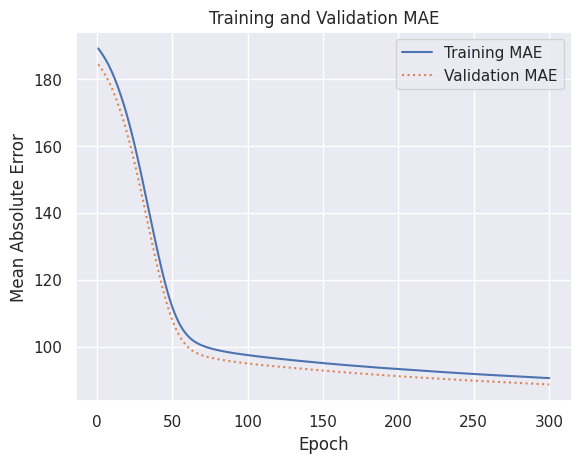

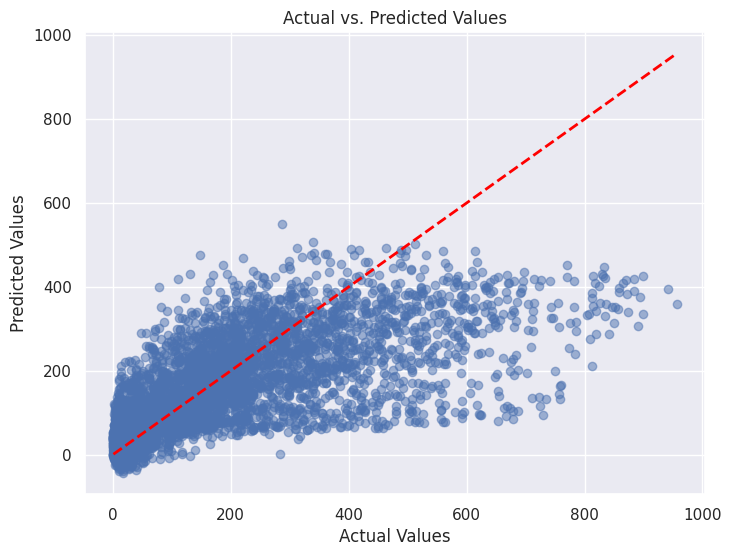

In [ ]:
from json import load
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model

import keras
import keras_tuner
from keras_tuner import RandomSearch

param_grid = {
    'epochs': [100, 200, 400, 600],
    #'batch_size':[5, 10, 20, 50],
        'unit':[1, 5, 10, 15],
}

#-------------------------------------------------data preprocessing------------------------------------------------------------------


#-------------------------------------------------network construction-----------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************
#
# def construct_network_model():
#   # Create a Sequential model, which is a linear stack of layers.
#   model = Sequential()

#   # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 11.
#   model.add(Dense(32, activation='relu', input_dim=11))

#   # # Add a Dropout layer with a dropout rate of 0.5.
#   # model.add(Dropout(0.5))

#   # Add another Dense layer with 64 units and ReLU activation.
#   model.add(Dense(64, activation='relu'))

#   # # Add another Dropout layer with a dropout rate of 0.5.
#   # model.add(Dropout(0.5))

#   # Add a final Dense layer with 1 unit (typically used for regression tasks).
#   model.add(Dense(1))
#   return model

# model=construct_network_model()
# # Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# # and MAE metric to be used during training.
# model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************

# Create a Sequential model, which is a linear stack of layers.
def build_model(hp):
  nn_model = Sequential()
  nn_model.add(Dense(units=hp.Int('units_', min_value=32, max_value=128, step=32),activation='relu'))
  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  nn_model.add(Dense(1))
  # Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
  nn_model.compile(optimizer= keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')), loss='mae', metrics=['mae'],)
  return nn_model

#-------------------------------------------------model train------------------------------------------------------------------
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model will be saved.
filepath = "weights.best.keras"

# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
params= {'validation_split': 0.25 , 'batch_size': 32, 'callbacks': [early_stop, reduce_lr,checkpoint], 'verbose': 0}

tuner = RandomSearch(build_model, objective= 'mae', max_trials=5, executions_per_trial=1, directory='hyperparam_tuning')
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test, y_test))
best_hyperParam = tuner.get_best_hyperparameters(num_trials=1)[0]

b_model = tuner.hypermodel.build(best_hyperParam)

# Train the model using the fit method.
hist_2 = b_model.fit(X_train_scaled, y_train, validation_split=0.25, epochs=300, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)


#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist_2.history['mae']
val_err = hist_2.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = b_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test_scaled)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

In [ ]:
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set the style of the plots using seaborn.
sns.set()

# Use the trained model to predict on the test data.
y_pred = b_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Root Mean Squared Error of linear model: {rmse_linear}")
print(f"R-squared of linear model: {r2_linear}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 90.65270447385325
Root Mean Squared Error: 18704.595897438798
R-squared: 0.4291354195631617
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 105.98821224341988
Root Mean Squared Error of linear model: 20061.9699767034
R-squared of linear model: 0.38770833990295206
